In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
# Dataset original
wines = pd.read_csv("whitewine.csv",sep=";")
feature_names = wines.drop(['quality'],axis=1).columns.values
X = wines.drop(['quality'], axis=1).values

In [7]:
import statistics
statistics.median(wines["quality"])

6.0

In [17]:
wines["quality"].value_counts()

6    1911
5    1230
7     746
8     154
4     138
3      17
9       4
Name: quality, dtype: int64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style="white")

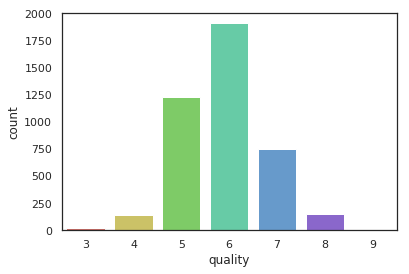

In [24]:
sns.countplot(x="quality",data=wines,palette="hls")
plt.show()

In [41]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,6.856381,0.278389,0.333557,6.413357,0.045673,35.219048,137.758333,0.994024,3.187786,0.489826,10.520622,5.883095
std,0.843218,0.101356,0.120082,5.103230,0.021899,16.952787,42.657233,0.003006,0.150757,0.114469,1.231589,0.883227
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996060,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.230000,65.800000,0.346000,289.000000,440.000000,1.039000,3.820000,1.080000,14.200000,9.000000


In [19]:
# Se cambia la calificion a binaria
wines_bin = wines.copy()
wines_bin.loc[wines_bin["quality"] < 6,'quality'] = 0 # quality <= 5 = 0 (malo)
wines_bin.loc[wines_bin["quality"] > 6,'quality'] = 1 # quality > 5 = 1 (bueno)
y_bin = wines_bin['quality'].values

In [21]:
len(wines_bin.loc[wines_bin["quality"] == 1])

904

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3)

In [14]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)*100

65.47619047619048

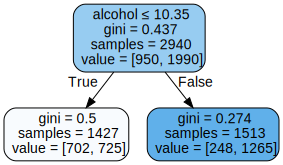

In [15]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= feature_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [18]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(solver="lbfgs")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)*100

/home/julian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


72.93650793650794